## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.491409 -0.936312  0.419874 -0.919244  0.420313 -1.380938
1  1.442001  1.043586  1.261143 -1.264237 -0.175373 -0.242567
2 -0.561958 -1.108654 -1.448247  1.194097  0.671860  0.800948
3 -1.461907 -0.197487 -0.358539  0.324778  0.870235 -0.599315
4  0.970313  1.130948 -1.491695 -0.484621  1.180790  1.568126


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9703316	total: 58ms	remaining: 57.9s
1:	learn: 0.9609036	total: 58.5ms	remaining: 29.2s
2:	learn: 0.9510396	total: 59.2ms	remaining: 19.7s
3:	learn: 0.9405165	total: 59.8ms	remaining: 14.9s
4:	learn: 0.9286651	total: 60.4ms	remaining: 12s
5:	learn: 0.9194477	total: 60.9ms	remaining: 10.1s
6:	learn: 0.9095984	total: 61.4ms	remaining: 8.71s
7:	learn: 0.8997913	total: 61.9ms	remaining: 7.68s
8:	learn: 0.8927921	total: 62.4ms	remaining: 6.87s
9:	learn: 0.8841064	total: 63ms	remaining: 6.24s
10:	learn: 0.8748745	total: 63.6ms	remaining: 5.72s
11:	learn: 0.8669490	total: 64.1ms	remaining: 5.28s
12:	learn: 0.8585571	total: 64.6ms	remaining: 4.91s
13:	learn: 0.8489058	total: 65.1ms	remaining: 4.59s
14:	learn: 0.8430180	total: 65.5ms	remaining: 4.3s
15:	learn: 0.8354258	total: 65.9ms	remaining: 4.05s
16:	learn: 0.8283451	total: 66.5ms	remaining: 3.84s
17:	learn: 0.8206846	total: 66.9ms	remaining: 3.65s
18:	learn: 0.8131670	total: 67.4ms	remaining: 3.48s

102:	learn: 0.4009743	total: 109ms	remaining: 946ms
103:	learn: 0.3980885	total: 109ms	remaining: 941ms
104:	learn: 0.3952412	total: 110ms	remaining: 936ms
105:	learn: 0.3924554	total: 111ms	remaining: 935ms
106:	learn: 0.3893541	total: 111ms	remaining: 929ms
107:	learn: 0.3861954	total: 112ms	remaining: 924ms
108:	learn: 0.3835352	total: 112ms	remaining: 917ms
109:	learn: 0.3807038	total: 113ms	remaining: 913ms
110:	learn: 0.3784565	total: 113ms	remaining: 907ms
111:	learn: 0.3760717	total: 114ms	remaining: 902ms
112:	learn: 0.3726068	total: 114ms	remaining: 897ms
113:	learn: 0.3697900	total: 115ms	remaining: 891ms
114:	learn: 0.3668834	total: 115ms	remaining: 886ms
115:	learn: 0.3639877	total: 116ms	remaining: 881ms
116:	learn: 0.3612617	total: 116ms	remaining: 875ms
117:	learn: 0.3586643	total: 116ms	remaining: 870ms
118:	learn: 0.3562460	total: 117ms	remaining: 865ms
119:	learn: 0.3539906	total: 117ms	remaining: 860ms
120:	learn: 0.3514608	total: 118ms	remaining: 856ms
121:	learn: 

256:	learn: 0.1349775	total: 188ms	remaining: 542ms
257:	learn: 0.1340826	total: 188ms	remaining: 541ms
258:	learn: 0.1332389	total: 189ms	remaining: 540ms
259:	learn: 0.1323829	total: 189ms	remaining: 539ms
260:	learn: 0.1313804	total: 190ms	remaining: 537ms
261:	learn: 0.1306992	total: 190ms	remaining: 536ms
262:	learn: 0.1299701	total: 191ms	remaining: 534ms
263:	learn: 0.1292558	total: 191ms	remaining: 533ms
264:	learn: 0.1284398	total: 192ms	remaining: 532ms
265:	learn: 0.1276962	total: 192ms	remaining: 530ms
266:	learn: 0.1269673	total: 193ms	remaining: 529ms
267:	learn: 0.1261317	total: 193ms	remaining: 527ms
268:	learn: 0.1252921	total: 193ms	remaining: 526ms
269:	learn: 0.1244328	total: 194ms	remaining: 524ms
270:	learn: 0.1235656	total: 194ms	remaining: 523ms
271:	learn: 0.1229707	total: 195ms	remaining: 521ms
272:	learn: 0.1222441	total: 195ms	remaining: 520ms
273:	learn: 0.1213610	total: 196ms	remaining: 519ms
274:	learn: 0.1206501	total: 196ms	remaining: 517ms
275:	learn: 

449:	learn: 0.0506973	total: 289ms	remaining: 354ms
450:	learn: 0.0504522	total: 290ms	remaining: 353ms
451:	learn: 0.0501803	total: 291ms	remaining: 352ms
452:	learn: 0.0500579	total: 291ms	remaining: 351ms
453:	learn: 0.0500066	total: 292ms	remaining: 351ms
454:	learn: 0.0497019	total: 292ms	remaining: 350ms
455:	learn: 0.0494050	total: 293ms	remaining: 349ms
456:	learn: 0.0492590	total: 293ms	remaining: 348ms
457:	learn: 0.0489721	total: 294ms	remaining: 348ms
458:	learn: 0.0489255	total: 294ms	remaining: 347ms
459:	learn: 0.0488795	total: 295ms	remaining: 346ms
460:	learn: 0.0486489	total: 295ms	remaining: 345ms
461:	learn: 0.0484731	total: 296ms	remaining: 345ms
462:	learn: 0.0482226	total: 296ms	remaining: 344ms
463:	learn: 0.0480024	total: 297ms	remaining: 343ms
464:	learn: 0.0477319	total: 298ms	remaining: 342ms
465:	learn: 0.0474500	total: 298ms	remaining: 341ms
466:	learn: 0.0471455	total: 298ms	remaining: 341ms
467:	learn: 0.0468476	total: 299ms	remaining: 340ms
468:	learn: 

600:	learn: 0.0301995	total: 368ms	remaining: 245ms
601:	learn: 0.0301138	total: 369ms	remaining: 244ms
602:	learn: 0.0300301	total: 370ms	remaining: 243ms
603:	learn: 0.0299233	total: 370ms	remaining: 243ms
604:	learn: 0.0298969	total: 371ms	remaining: 242ms
605:	learn: 0.0298297	total: 371ms	remaining: 241ms
606:	learn: 0.0297231	total: 371ms	remaining: 240ms
607:	learn: 0.0295814	total: 372ms	remaining: 240ms
608:	learn: 0.0295166	total: 372ms	remaining: 239ms
609:	learn: 0.0294135	total: 373ms	remaining: 238ms
610:	learn: 0.0293552	total: 373ms	remaining: 238ms
611:	learn: 0.0292575	total: 374ms	remaining: 237ms
612:	learn: 0.0291204	total: 374ms	remaining: 236ms
613:	learn: 0.0290210	total: 375ms	remaining: 236ms
614:	learn: 0.0289647	total: 375ms	remaining: 235ms
615:	learn: 0.0288696	total: 376ms	remaining: 234ms
616:	learn: 0.0287366	total: 376ms	remaining: 234ms
617:	learn: 0.0286346	total: 377ms	remaining: 233ms
618:	learn: 0.0285055	total: 377ms	remaining: 232ms
619:	learn: 

805:	learn: 0.0130506	total: 473ms	remaining: 114ms
806:	learn: 0.0129967	total: 474ms	remaining: 113ms
807:	learn: 0.0129523	total: 474ms	remaining: 113ms
808:	learn: 0.0128755	total: 475ms	remaining: 112ms
809:	learn: 0.0128169	total: 475ms	remaining: 112ms
810:	learn: 0.0127407	total: 476ms	remaining: 111ms
811:	learn: 0.0126977	total: 477ms	remaining: 110ms
812:	learn: 0.0126404	total: 477ms	remaining: 110ms
813:	learn: 0.0125731	total: 478ms	remaining: 109ms
814:	learn: 0.0125223	total: 478ms	remaining: 109ms
815:	learn: 0.0124694	total: 479ms	remaining: 108ms
816:	learn: 0.0123965	total: 479ms	remaining: 107ms
817:	learn: 0.0123507	total: 480ms	remaining: 107ms
818:	learn: 0.0122942	total: 480ms	remaining: 106ms
819:	learn: 0.0122510	total: 481ms	remaining: 106ms
820:	learn: 0.0121650	total: 481ms	remaining: 105ms
821:	learn: 0.0121229	total: 482ms	remaining: 104ms
822:	learn: 0.0120819	total: 482ms	remaining: 104ms
823:	learn: 0.0120179	total: 483ms	remaining: 103ms
824:	learn: 

954:	learn: 0.0074917	total: 552ms	remaining: 26ms
955:	learn: 0.0074742	total: 553ms	remaining: 25.4ms
956:	learn: 0.0074471	total: 553ms	remaining: 24.9ms
957:	learn: 0.0074328	total: 554ms	remaining: 24.3ms
958:	learn: 0.0074202	total: 554ms	remaining: 23.7ms
959:	learn: 0.0073836	total: 555ms	remaining: 23.1ms
960:	learn: 0.0073714	total: 555ms	remaining: 22.5ms
961:	learn: 0.0073391	total: 555ms	remaining: 21.9ms
962:	learn: 0.0073113	total: 556ms	remaining: 21.4ms
963:	learn: 0.0072995	total: 557ms	remaining: 20.8ms
964:	learn: 0.0072881	total: 557ms	remaining: 20.2ms
965:	learn: 0.0072564	total: 558ms	remaining: 19.6ms
966:	learn: 0.0072236	total: 558ms	remaining: 19ms
967:	learn: 0.0071924	total: 559ms	remaining: 18.5ms
968:	learn: 0.0071655	total: 559ms	remaining: 17.9ms
969:	learn: 0.0071353	total: 560ms	remaining: 17.3ms
970:	learn: 0.0071048	total: 560ms	remaining: 16.7ms
971:	learn: 0.0070766	total: 560ms	remaining: 16.1ms
972:	learn: 0.0070454	total: 561ms	remaining: 15.6

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

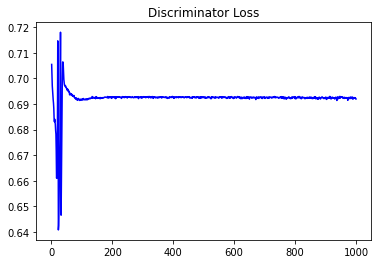

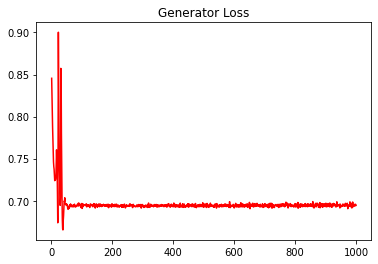

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.14440945847074857


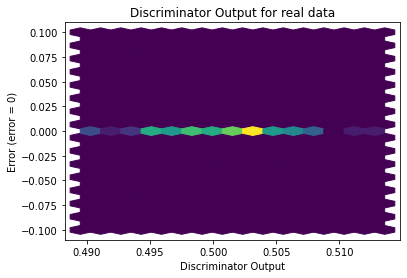

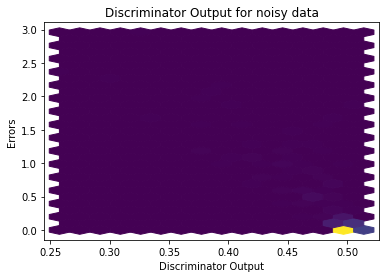

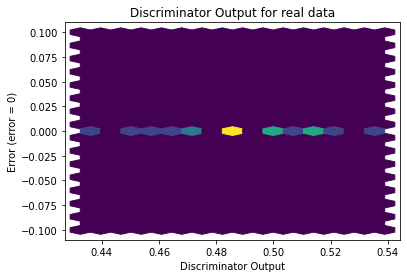

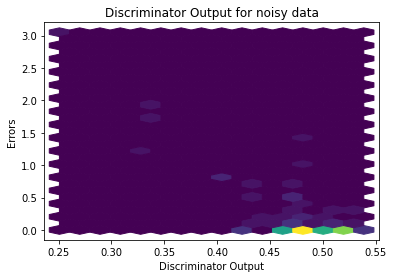

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


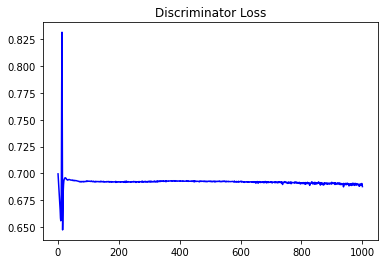

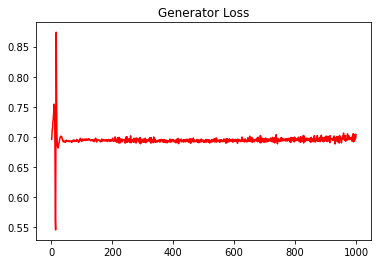

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.21321791539244675


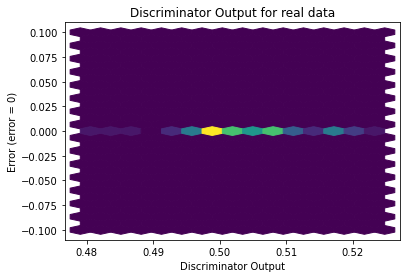

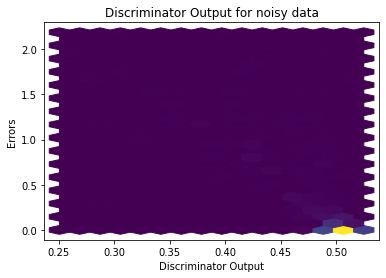

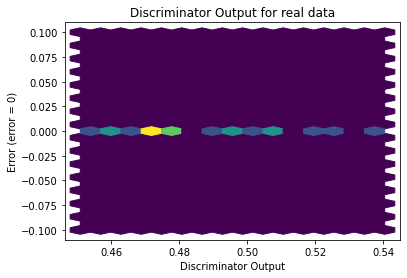

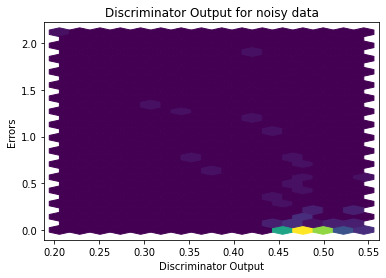

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0738]], requires_grad=True)
